In [ ]:
import numpy #biblioteca para manipulação de matrizes
from matplotlib import pyplot as plt #biblioteca para crianção de gráficos
#início das iportações de classes do Keras (modelos de deep learning)
from keras.datasets import mnist #importa dataset mnist
from keras.models  import Sequential #importa um modelo sequencial 
from keras.layers import Dense, InputLayer #importa camadas totalmente conectadas
from keras.layers import Dropout #importa estrutura de dropout
from keras.utils import np_utils #importa biblioteca de utilizades do keras


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


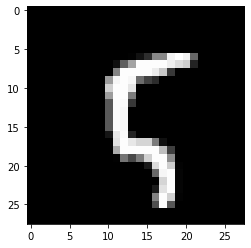

5


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #importa o dataset mnist
print(x_train.shape)
first_image = x_train[100] #obtém a imagem de treino no índice 100 do vetor
#realiza manipulação dos dados da imagem
first_image = numpy.array(first_image, dtype='float')
pixels = first_image.reshape((28,28))
#exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()
print(y_train[100]) #imprimi a classe de imagem do índice 100

In [ ]:
num_pixels = x_train.shape[1] * x_train.shape[2] #calcula o total de pixels da imagem. CE - camada de entrada
print(num_pixels)

#transforma os valores dos pixels para float32
x_train2 = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test2 = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

x_train2 = x_train2/255
x_test2 = x_test2/255

print(x_train)
print(x_train2)

784
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#transforma os y em one-hot vector
y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)
validation_data=( np_utils.to_categorical(y_train), x_train2)
validation_data2=( x_train2, np_utils.to_categorical(y_train))

print(validation_data)
print(validation_data2)

#obtém o número de classes do problema. CS - camada de saída
num_classes = y_test_h.shape[1]

print(num_pixels)
print(num_classes)
print(y_train[100])
print(y_train_h[100])

(array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 

In [ ]:
#criar um modelo do tipo de sequencia
model = Sequential()
model.add(InputLayer(input_shape=num_pixels)) #cria a camada de entrada
model.add(Dense(1024, kernel_initializer='normal', input_dim=num_pixels, activation='relu')) #cria a primeira camada da rede
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) #cria a primeira camada da rede
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) #cria a camada de saída softmax transforma um vetor de valores em uma distribuição de probabilidades

model.summary() #imprimi informações sobre o modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20490     
Total params: 2,923,530
Trainable params: 2,923,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #compila o modelo criado
result = model.fit(x_train2, y_train_h, validation_data=(x_test2, y_test_h), epochs=20, verbose=1, batch_size=100) #executa o treinamento

Epoch 1/20
600/600 [==============================] - 7s 7ms/step - loss: 0.1763 - accuracy: 0.9470 - val_loss: 0.0990 - val_accuracy: 0.9697
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0706 - accuracy: 0.9772 - val_loss: 0.0846 - val_accuracy: 0.9725
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0775 - val_accuracy: 0.9749
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0797 - val_accuracy: 0.9783
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0727 - val_accuracy: 0.9794
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0823 - val_accuracy: 0.9782
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0225 - accuracy: 0.9923 - val_loss: 0.0796 - val_accuracy: 0.9789
Epoch 

In [ ]:
x = x_train2[100]
print(x.shape)
x = numpy.expand_dims(x, axis=0)
print(x.shape)
print(model.predict(x))
print(numpy.argmax(model.predict(x)))

(784,)
(1, 784)
[[9.9373104e-20 6.2682615e-22 3.7704110e-20 4.7890582e-15 2.0051072e-23
  1.0000000e+00 1.3465786e-12 6.9012348e-25 9.2958016e-11 1.6196256e-11]]
5
